In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
orders = "List_of_Orders_55FFC79CF8.csv"
order_details = "Order_Details_19795F61CF.csv"
sales_target = "Sales_target_DD2E9B96A0.csv"

In [46]:
orders_df = pd.read_csv(orders)
order_details_df = pd.read_csv(order_details)
sales_target_df = pd.read_csv(sales_target)

In [47]:
sales_target_df.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [48]:
orders_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [49]:
order_details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [50]:
merge_df = pd.merge(order_details_df, orders_df, on="Order ID")

## Merge the List of Orders and Order Details datasets on the basis of Order ID.

In [51]:
merge_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


# Part 1: Sales and Profitability Analysis

### Calculate the total sales (Amount) for each category across all orders.

In [52]:
cat_sales = merge_df.groupby("Category").agg(total_sales=("Amount", "sum"),
    total_Profit=("Profit", "sum"),
    Avg_Profit_per_Order=("Profit", "mean")).reset_index()

In [53]:
print("total sales (Amount) for each Category:\n", cat_sales[["Category", "total_sales"]])

total sales (Amount) for each Category:
       Category  total_sales
0     Clothing     139054.0
1  Electronics     165267.0
2    Furniture     127181.0


###  Calculate Profit Margin


In [54]:
cat_sales["Profit_Margin"] = (cat_sales["total_Profit"] / cat_sales["total_sales"]) * 100

### Identify the top-performing and underperforming categories based on these metrics.
### Also, suggest reasons for their performance differences.

In [55]:
top_categories = cat_sales.sort_values(by="total_sales", ascending=False)
underperforming_categories = cat_sales.sort_values(by="Profit_Margin")

In [56]:
print("\nTop-Performing Categories:\n", top_categories)

print("\nUnderperforming Categories:\n", underperforming_categories)


Top-Performing Categories:
       Category  total_sales  total_Profit  Avg_Profit_per_Order  Profit_Margin
1  Electronics     165267.0       10494.0             34.071429       6.349725
0     Clothing     139054.0       11163.0             11.762908       8.027817
2    Furniture     127181.0        2298.0              9.456790       1.806874

Underperforming Categories:
       Category  total_sales  total_Profit  Avg_Profit_per_Order  Profit_Margin
2    Furniture     127181.0        2298.0              9.456790       1.806874
1  Electronics     165267.0       10494.0             34.071429       6.349725
0     Clothing     139054.0       11163.0             11.762908       8.027817


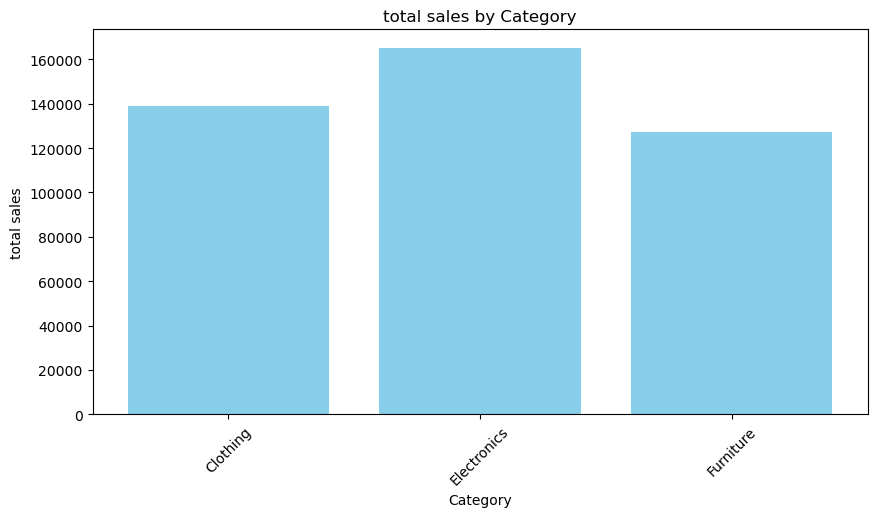

In [57]:
plt.figure(figsize=(10,5))
plt.bar(cat_sales["Category"], cat_sales["total_sales"], color='skyblue')
plt.xlabel("Category")
plt.ylabel("total sales")
plt.title("total sales by Category")
plt.xticks(rotation=45)
plt.show()

# Insights from this analysis:


 1. **Furniture has high sales but poor profit**.
 2. **Clothing** got the highest profit margin.
 3. **Electronics** has the highest total sales but moderate profitability.

# Part 2: Target Achievement Analysis

In [58]:
furniture_target_df = sales_target_df[sales_target_df["Category"] == "Furniture"].copy()

In [59]:
furniture_target_df["Month of Order Date"] = pd.to_datetime(furniture_target_df["Month of Order Date"], format="%b-%y")


In [60]:
furniture_target_df = furniture_target_df.sort_values(by="Month of Order Date")

In [61]:
furniture_target_df["Target_Perc_Change"] = furniture_target_df["Target"].pct_change() * 100

In [62]:
print("Month-over-Month Percentage Change in Target Sales (Furniture):\n",
      furniture_target_df[["Month of Order Date", "Target_Perc_Change"]])

Month-over-Month Percentage Change in Target Sales (Furniture):
    Month of Order Date  Target_Perc_Change
0           2018-04-01                 NaN
1           2018-05-01            0.961538
2           2018-06-01            0.952381
3           2018-07-01            1.886792
4           2018-08-01            0.925926
5           2018-09-01            0.917431
6           2018-10-01            0.909091
7           2018-11-01            1.801802
8           2018-12-01            0.884956
9           2019-01-01            0.877193
10          2019-02-01            0.869565
11          2019-03-01            1.724138


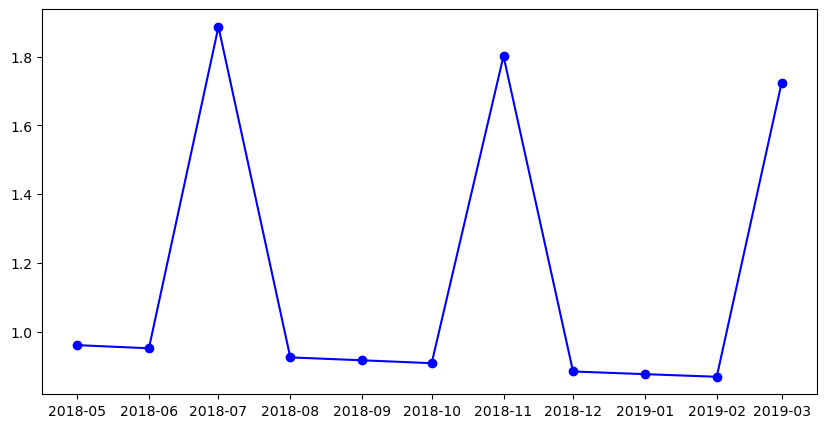

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(furniture_target_df["Month of Order Date"], furniture_target_df["Target_Perc_Change"], marker='o', linestyle='-', color='b')

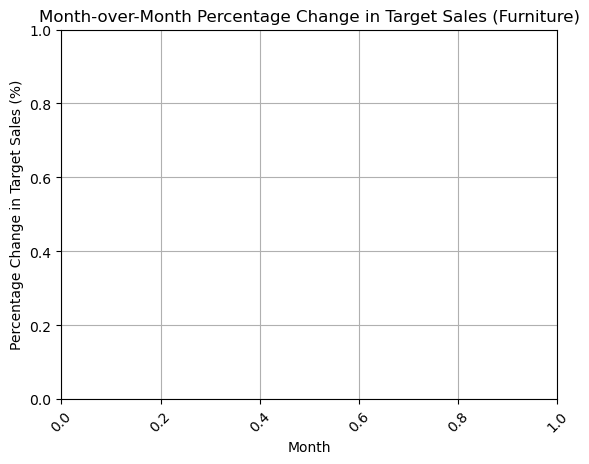

In [64]:
plt.xlabel("Month")
plt.ylabel("Percentage Change in Target Sales (%)")
plt.title("Month-over-Month Percentage Change in Target Sales (Furniture)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Insights from this Analysis:

**July 2018** & **March 2019 Spikes** – These may indicate seasonal demand, promotions, or may be changes in business strategy.

## Suggestions:
**need to identify external factors (seasonality, promotions) influencing fluctuations.**

# Part 3: Regional Performance Insights

### Identify the top 5 states with the highest order count

In [65]:
top_states = merge_df["State"].value_counts().head(5).index

In [66]:
top_states_df = merge_df[merge_df["State"].isin(top_states)]

In [67]:
regional_performance = top_states_df.groupby("State").agg(total_sales=("Amount", "sum"),Avg_Profit=("Profit", "mean"),
    Order_Count=("Order ID", "count")).reset_index()

In [68]:
print(regional_performance)

            State  total_sales  Avg_Profit  Order_Count
0           Delhi      22531.0   40.364865           74
1         Gujarat      21058.0    5.344828           87
2  Madhya Pradesh     105140.0   16.326471          340
3     Maharashtra      95348.0   21.296552          290
4       Rajasthan      21149.0   16.986486           74


In [72]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Gujarat'),
  Text(2, 0, 'Madhya Pradesh'),
  Text(3, 0, 'Maharashtra'),
  Text(4, 0, 'Rajasthan')])

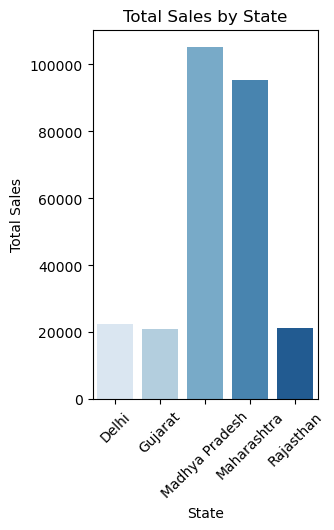

In [74]:
plt.subplot(1, 2, 1)
sns.barplot(x="State", y="total_sales", data=regional_performance, palette="Blues")
plt.title("Total Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)

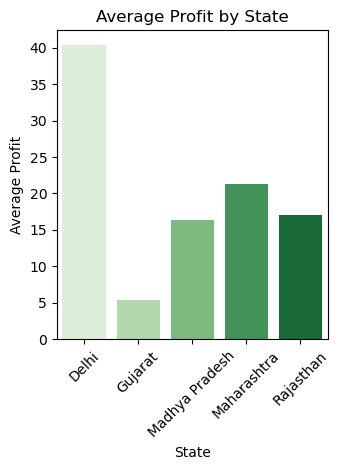

In [77]:
plt.subplot(1, 2, 2)
sns.barplot(x="State", y="Avg_Profit", data=regional_performance, palette="Greens")
plt.title("Average Profit by State")
plt.xlabel("State")
plt.ylabel("Average Profit")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## Insights :

1> **Madhya Pradesh** and **Maharashtra** have the highest sales and order count, but Maharashtra's profit per order is slightly better.

2> **Gujarat** shows low average profit (₹5.3) despite a good number of orders, indicating high costs or discounts.

3> **Delhi** has the highest average profit per order (₹40.3) but lower total sales, meaning it sells premium or high-margin products.

# App Exploration:

### Explore the features and user experience of the Jar app. Highlight five things you found particularly effective and user-friendly. Additionally, identify five areas where improvements could be made, providing your reasoning for each suggestion.

**So, basically Jar app is a fintech platform which is designed for helping users to make a habit of saving by investing small
amount in digital gold. 

**Talking about effective features : 
    so , Jar automaically rounds up which is nearest to $10  or  $5  investing the spare change into the digital gold. So this 
    approach encourages consistent savings without requiring active uers intervention.
    
    **Users can start their investing with a small amount of money $10 ,which is accessible for small , individual financial
   **backgrounds to start their savings journey.
    
    User friendly Interface which is good and smooth experience even for those who has not well versed in technology.
    
    
 **Now , lets talk about some areas for Improvement :

There are some users who faced difficulties with withdrawing money and contacting customer support.

Jar should focus on wide range of avenues like mutual funds or fixed deposits could cater to users seeking diversified 
portfolios.

While the app simplifies investing in digital gold, offering educational content about investment strategies and financial 
planning could empower the users to make more informed decisions .**
    

## Question 3: (10 marks)
Product Exploration:
The Jar app provides users with an innovative way to save and invest in digital gold,
starting with as little as ₹10. It automates savings and investments, making financial
planning seamless and accessible. As the first Made-in-India app to pioneer such a
solution, Jar has successfully created a niche in automated savings and investment.
Building on its strong foundation and leveraging its existing user base and trust, what
are some new business opportunities Jar could venture into, to expand its offerings and
enhance user engagement? Discuss how the app can utilize its strengths, such as
automation, a user-friendly design, and established credibility, to seamlessly integrate
these new services, deepen its value proposition, and achieve significant milestones in
the financial ecosystem.

In [ ]:
** Jar has already established successfully itself as a trusted and user friendly using savings and investment platform.
To expand this , the app should leverage its automation capabilities, simple interface , easy to understand and credibility to 
introduce new financial services.
There are some opportunities which is completely align with its strengths.

1. Instant Micro loan and buy now , pay later :  Its leveraging users savings and transaction to offer small , interest free 
    loan services.
    
2. Jar should introduce Customised savings plans where users can set finanicial goals like Travel, Education , Emergency funds .

3. Jar offers Micro insurance plans for health, accident or life insurance that users can pay small daily installments or 
monthly installments.
